In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

f:\python-3.6\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [24]:
orig = pd.read_csv('mushrooms.csv')
orig.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
orig.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
orig.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
orig.shape

(8124, 23)

In [6]:
orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
for attr in orig.columns:
    print('\n*', attr, '*')
    print(orig[attr].value_counts())


* class *
e    4208
p    3916
Name: class, dtype: int64

* cap-shape *
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

* cap-surface *
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

* cap-color *
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

* bruises *
f    4748
t    3376
Name: bruises, dtype: int64

* odor *
n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64

* gill-attachment *
f    7914
a     210
Name: gill-attachment, dtype: int64

* gill-spacing *
c    6812
w    1312
Name: gill-spacing, dtype: int64

* gill-size *
b    5612
n    2512
Name: gill-size, dtype: int64

* gill-color *
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

* stalk-shape *
t    4608
e    3516
N

<AxesSubplot:xlabel='ring-number', ylabel='count'>

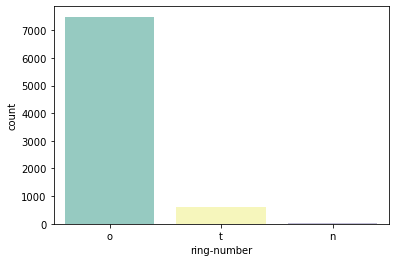

In [11]:
sns.countplot(orig['ring-number'],palette="Set3")

<AxesSubplot:xlabel='veil-color', ylabel='count'>

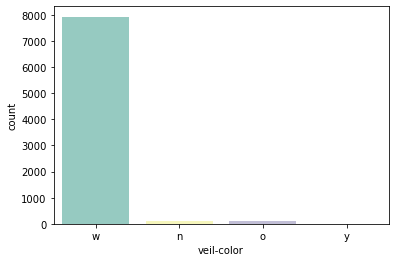

In [12]:
sns.countplot(orig['veil-color'],palette="Set3")

<AxesSubplot:xlabel='stalk-root', ylabel='count'>

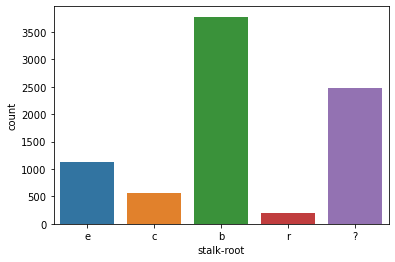

In [13]:
sns.countplot(orig['stalk-root'])

<AxesSubplot:xlabel='gill-size', ylabel='count'>

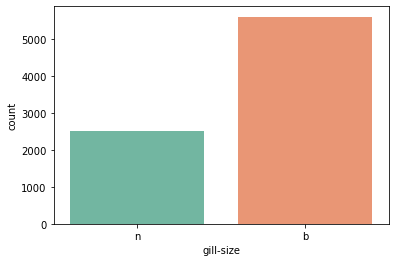

In [30]:
sns.countplot(orig['gill-size'],palette = "Set2")

<AxesSubplot:xlabel='gill-attachment', ylabel='count'>

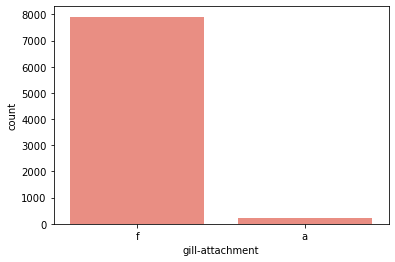

In [31]:
sns.countplot(orig['gill-attachment'],color="salmon")

<AxesSubplot:xlabel='odor', ylabel='count'>

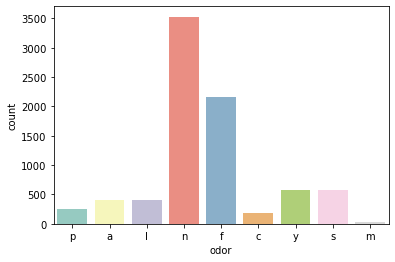

In [16]:
sns.countplot(orig['odor'],palette="Set3")

<AxesSubplot:xlabel='bruises', ylabel='count'>

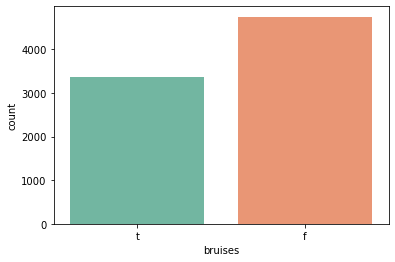

In [27]:
sns.countplot(orig['bruises'],palette = "Set2")

<AxesSubplot:xlabel='cap-color', ylabel='count'>

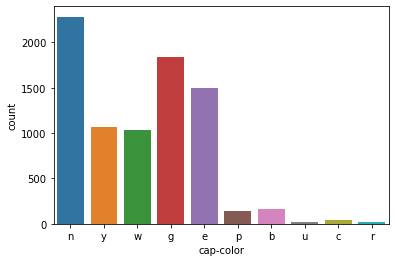

In [18]:
sns.countplot(orig['cap-color'])

<AxesSubplot:xlabel='class', ylabel='count'>

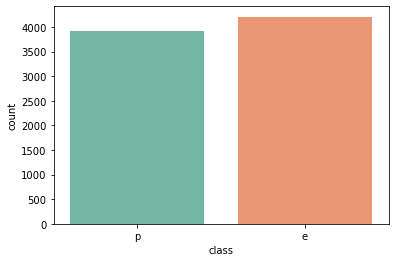

In [28]:
sns.countplot(orig['class'],palette = "Set2")

<AxesSubplot:xlabel='cap-shape', ylabel='count'>

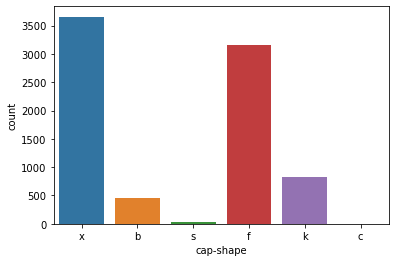

In [20]:
sns.countplot(orig['cap-shape'])

<AxesSubplot:xlabel='cap-surface', ylabel='count'>

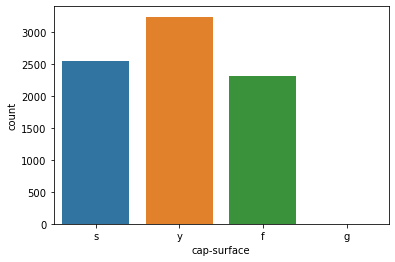

In [21]:
sns.countplot(orig['cap-surface'])

In [32]:
#The 'class' column contains our labels.
#It tells us whether the mushroom is 'poisonous' or 'edible'.
X = orig.drop(['class'], axis=1)
y = orig['class']

In [33]:
X.drop(['veil-type'], axis=1, inplace=True)

We'll use a simple binary encoding for variables that hold only 2 possible values, and a one-hot-encoding for variables that hold 3 or more possible values

In [34]:
#For columns with only two values
for col in X.columns:
    if len(X[col].value_counts()) == 2:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

In [35]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,1,p,1,0,1,k,0,...,s,s,w,w,w,o,p,k,s,u
1,x,s,y,1,a,1,0,0,k,0,...,s,s,w,w,w,o,p,n,n,g
2,b,s,w,1,l,1,0,0,n,0,...,s,s,w,w,w,o,p,n,n,m
3,x,y,w,1,p,1,0,1,n,0,...,s,s,w,w,w,o,p,k,s,u
4,x,s,g,0,n,1,1,0,k,1,...,s,s,w,w,w,o,e,n,a,g


In [36]:
#And now we 'one-hot-encode' the rest of the variables:

X = pd.get_dummies(X)
X.head()

,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
le = LabelEncoder()
y = le.fit_transform(y)

y

array([1, 0, 0, ..., 0, 1, 0])

In [38]:
#Our training set will hold 80% of the data
#and the test set will hold 20% of the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20)

In [40]:
#K-Means Clustering with two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(train_X)#Note that kmeans is unlabeled...

KMeans(n_clusters=2)

In [42]:
kmeans_pred = kmeans.predict(test_X)

In [43]:
kmeans_pred_2 = []
for x in kmeans_pred:
    if x == 1:
        kmeans_pred_2.append(0)
    elif x == 0:
        kmeans_pred_2.append(1)
        
kmeans_pred_2 = np.array(kmeans_pred_2)

In [44]:
if accuracy_score(kmeans_pred, test_y, normalize=False) < accuracy_score(kmeans_pred_2, test_y, normalize=False):
    kmeans_pred = kmeans_pred_2

In [45]:
#This DataFrame will allow us to visualize our results.
result_df = pd.DataFrame()

#The column containing the correct class for each mushroom in the test set, 'test_y'.
result_df['test_y'] = np.array(test_y) #(don't wanna make that mistake again!)

#The predictions made by K-Means on the test set, 'test_X'.
result_df['kmeans_pred'] = kmeans_pred
#The column below will tell us whether each prediction made by our K-Means model was correct.
result_df['kmeans_correct'] = result_df['kmeans_pred'] == result_df['test_y']

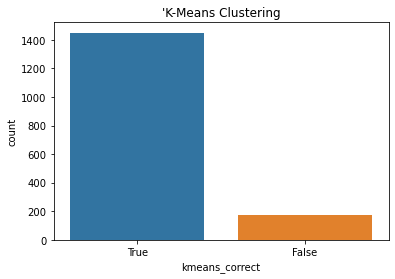

In [48]:
sns.countplot(x=result_df['kmeans_correct'], order=[True,False])
plt.title("'K-Means Clustering")
plt.show()